In [17]:
from dataset import DetectionDataset
from utils import plot_images
from default_boxes import *
from utils import xywh2xyxy, draw_rectangles, images_with_rectangles
import matplotlib.pyplot as plt

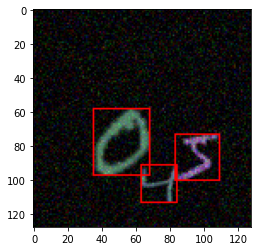

In [18]:
# get sample image and object coordinates 
trainset = DetectionDataset(data_type='train')
sample_image, sample_labels = trainset[0]
sample_labels = sample_labels.iloc[:, 1:5].values
sample_labels = xywh2xyxy(sample_labels)

# visualization 
rected_image = draw_rectangles(sample_image*255, sample_labels)
plt.imshow(rected_image)
plt.show()

In [21]:
fmap = tf.constant(shape=(2, 8, 8, 2), value=1)
h, w = fmap.get_shape()[1:3]
n_layer = 11
paddings = ['SAME'] * n_layer
strides = [1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2]
kernel_sizes = [3] * n_layer
center_xy = original_rectangle_coords((h, w), kernel_sizes, strides, paddings)[:, :2]

# get w, h
scales = [30]
ratios = [(1, 1),
          (1.5, 0.5),
          (1.2, 0.8),
          (0.8, 1.2),
          (1.4, 1.4)]
sizes = generate_default_boxes(scales, ratios)

# Get default boxes over feature map
default_boxes = tiling_default_boxes(center_xy, sizes)
default_boxes = xywh2xyxy(default_boxes)

# opencv 는 minus 좌표계를 지원하지 않아서 minus 좌표계는 0으로 변환함
sample_clipped_boxes = np.where(default_boxes >0, default_boxes, 0)

# 좌표 하나에 그려질 모든 anchor을 그린다.
n_samples = h * w
backgrounds = [rected_image]*n_samples
rected_imgs = images_with_rectangles(backgrounds, sample_clipped_boxes)

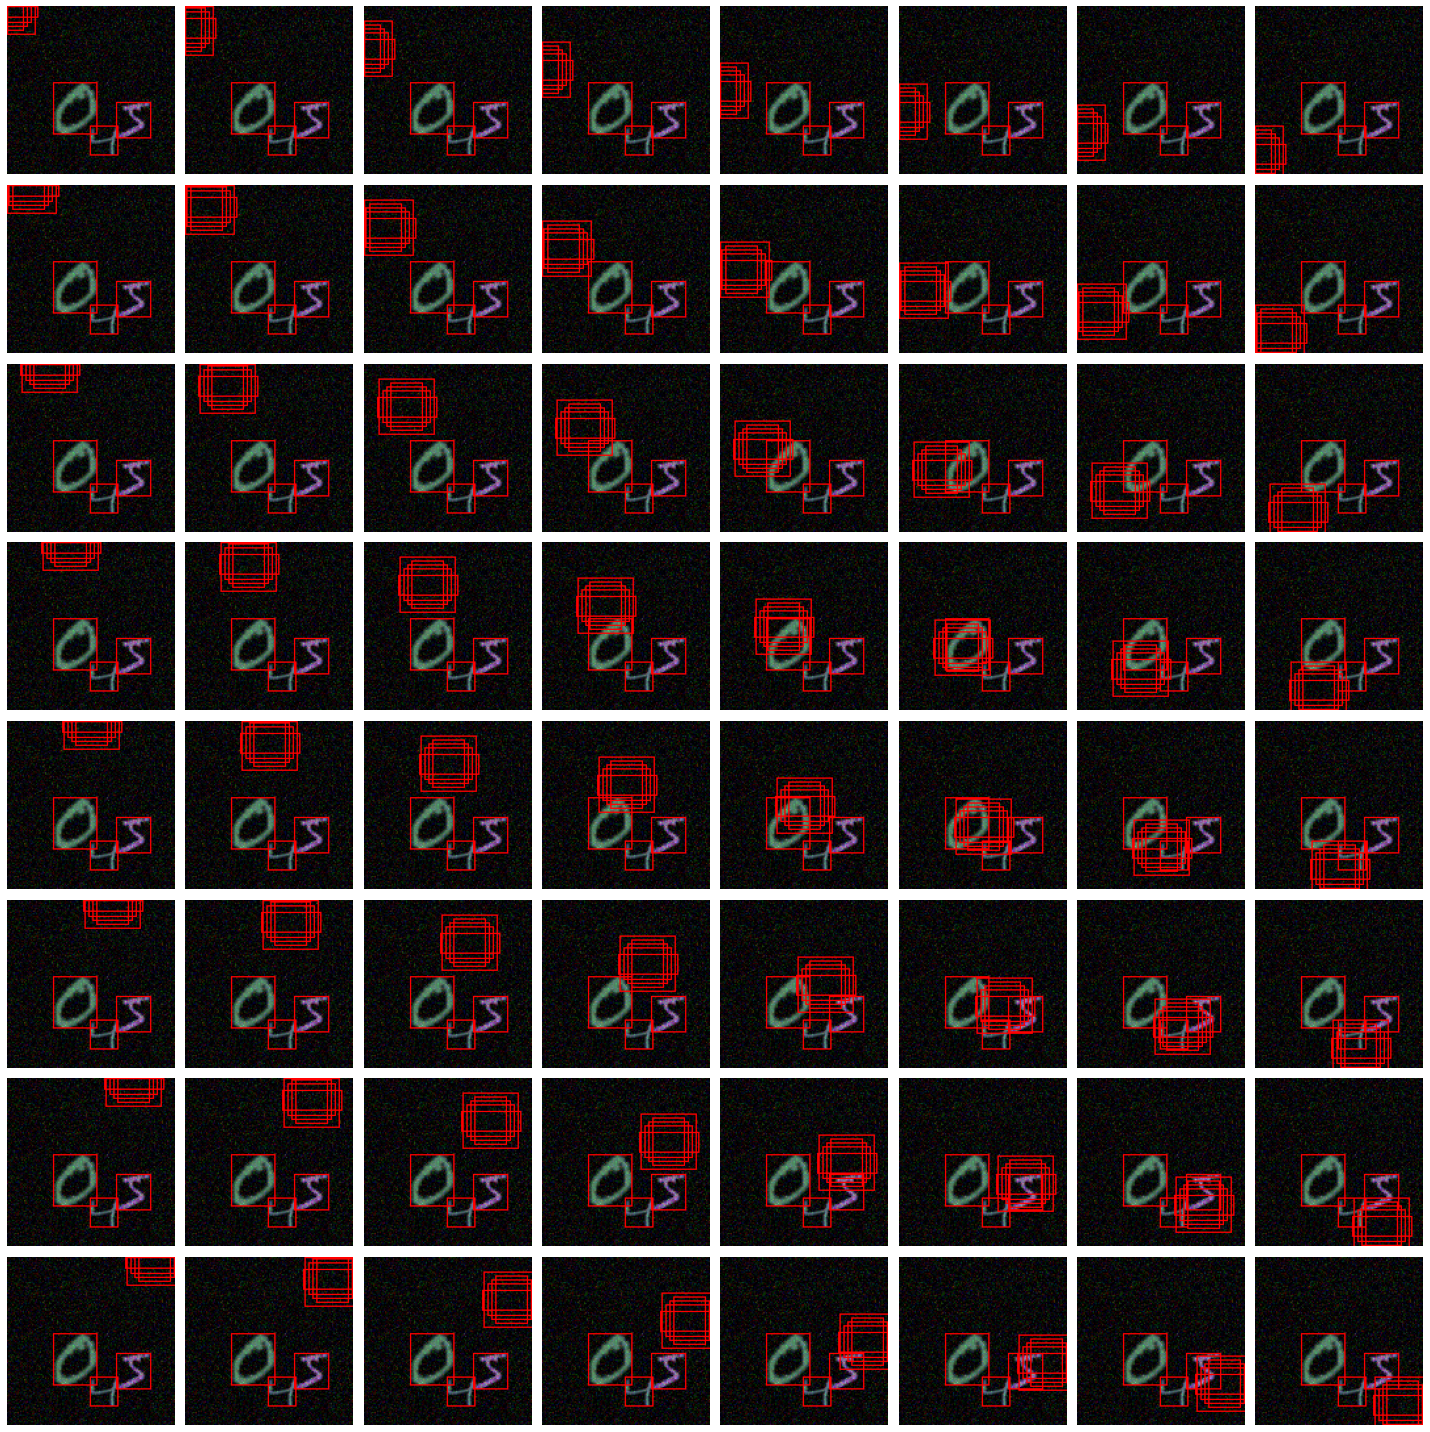

In [22]:
plot_images(rected_imgs)

In [ ]:
# flatten default boxes (N, 5, 4) -> (N*5, 4)
default_boxes = default_boxes.reshape(-1, 4)
